In [1]:
import gensim
import pandas as pd

In [2]:
print(gensim.__version__)

4.3.0


In [6]:
df = pd.read_csv("D:/Gaurav/NLP/projects/Topic Modelling/tokyo_2020_tweets/tokyo_2020_tweets.csv")

C:\Users\Gaurav_Singh\AppData\Local\Temp\ipykernel_22900\881461222.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/Gaurav/NLP/projects/Topic Modelling/tokyo_2020_tweets/tokyo_2020_tweets.csv")


In [7]:
df.shape

(297011, 16)

In [8]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45.0,39.0,293.0,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235.0,5.0,2969.0,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646.0,3.0,5.0,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975.0,2724.0,36554.0,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6.0,37.0,31.0,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False


In [9]:
docs = df['text'].tolist()

In [10]:
docs[100]

"It's a huge upset for  #TeamIndia as Vikas Krishan is eliminated in first round itself in #Boxing at #Tokyo2020… https://t.co/Tz6zRMXSSt"

In [11]:
docs[56]

"𝐎𝐅𝐅 𝐖𝐄 𝐆𝐎 😍\n\n1st medal comes home as @mirabai_chanu wins 🥈 in women's 49kg weightlifting. BFI congratulates her for… https://t.co/PbFvNtR38O"

In [12]:
docs[344]

'Janasena chief @PawanKalyan congratulates\nweightlifter @mirabai_chanu on winning\nsilver medal at Olympics 👏… https://t.co/xlQXZngWyR'

In [13]:
# need to do preprocessing
    #removing urls/emojis/username/numbers(because number can't have specific topic)/punctuations/do lower case/stopwards
    #lemmatize

### Preprocessing

In [29]:
import re
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gaurav_Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gaurav_Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
# >>> import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gaurav_Singh\AppData\Roaming\nltk_data...


True

In [32]:
stopwords = stopwords.words("english")

In [51]:
from nltk.stem import WordNetLemmatizer

In [53]:
lemmatizer = WordNetLemmatizer()

In [55]:
docs = docs[0:6000]
len(docs)

6000

In [56]:
# these preprocessing steps has to be repeated/done again if we want to infernce the generated model on new data
# so its advised to prepare a function and call it whenver required

def preprocessing_text(docs):
    cleaned_text = []
    for text in docs[0:6000]:
        text = text.lower() # lowering cases
    #     print(text)
        text = re.sub(r'https\S','',text) # removing url
        text = re.sub(r'@[\w\d_]','',text) # removing username
        text = re.sub(r'#[\w\d_]*','',text) # removing hashtags

        text = text.translate(str.maketrans("","",punctuation))
    #     print(text)
        tokens = word_tokenize(text)
    #     print(tokens)
        tokens = [token for token in tokens if token.isalpha()] # removing numbers and emojis, keeping only alphabets

        tokens = [token for token in tokens if token not in stopwords]
    #     print(tokens)
        tokens = [lemmatizer.lemmatize(token) for token in tokens] #lemmatizing the tokens

        cleaned_text.append(tokens)
        
    return cleaned_text

In [59]:
cleaned_text = preprocessing_text(docs)

In [63]:
cleaned_text[1780]

['india',
 'ki',
 'chaandi',
 'mirabai',
 'chanu',
 'lift',
 'becoming',
 'first',
 'indian',
 'medallist']

In [64]:
cleaned_text # its a list of list

[['let', 'party', 'begin'],
 ['congratulation'],
 ['big',
  'breaking',
  'tokyo',
  'olympic',
  'update',
  'japan',
  'first',
  'gold',
  'takato',
  'naohisa',
  'gold',
  'men',
  'kg',
  'judo'],
 ['great',
  'britain',
  'finally',
  'find',
  'way',
  'way',
  'pieterse',
  'jack',
  'waller',
  'finding',
  'net',
  'via',
  'stick'],
 ['think', 'every', 'time', 'watch', 'ring', 'event', 'tcocjaxefnyzd'],
 ['woman', 'empowerment', 'real'],
 ['cant',
  'help',
  'cheer',
  'banda',
  'goal',
  'game',
  'zambia',
  'goal',
  'difference',
  'well',
  'done',
  'getting'],
 ['nquirerdotnet',
  'tjochoainq',
  'caloy',
  'yulos',
  'however',
  'good',
  'sixth',
  'ring'],
 ['green',
  'card',
  'canada',
  'captain',
  'scott',
  'tupper',
  'follow',
  'live',
  'scorecard'],
 ['hearty',
  'congratulation',
  'indian',
  'railway',
  'player',
  'saikhom',
  'mirabai',
  'chanu',
  'winning',
  'first',
  'medal'],
 ['great', 'first', 'round', 'ring', 'edrielzxs'],
 ['gymnast

In [ ]:
# datset = [[doc1],[doc2]]  this is the format of data we require for buildng model

In [65]:
from gensim import corpora
from gensim.models import LdaModel

In [66]:
dictionary = corpora.Dictionary(cleaned_text)

In [67]:
dictionary 

In [68]:
corpus = [dictionary.doc2bow(doc) for doc in cleaned_text] # vectorizing each data in cleaned text into BOW

In [69]:
lda_model = LdaModel(corpus = corpus,id2word=dictionary,num_topics=10,passes=10)

In [70]:
lda_model.print_topics()

[(0,
  '0.027*"well" + 0.018*"done" + 0.013*"look" + 0.012*"like" + 0.010*"yulo" + 0.008*"smith" + 0.008*"minute" + 0.007*"show" + 0.007*"played" + 0.007*"people"'),
 (1,
  '0.023*"match" + 0.016*"olympic" + 0.014*"sport" + 0.014*"olympics" + 0.013*"today" + 0.013*"single" + 0.012*"tennis" + 0.011*"men" + 0.010*"win" + 0.009*"morning"'),
 (2,
  '0.037*"game" + 0.018*"woman" + 0.018*"goal" + 0.016*"football" + 0.016*"banda" + 0.016*"zambia" + 0.015*"two" + 0.013*"team" + 0.012*"china" + 0.011*"watch"'),
 (3,
  '0.029*"heat" + 0.018*"vikas" + 0.017*"men" + 0.016*"round" + 0.016*"woman" + 0.012*"rule" + 0.012*"butterfly" + 0.011*"win" + 0.010*"krishan" + 0.010*"next"'),
 (4,
  '0.023*"v" + 0.015*"south" + 0.014*"great" + 0.013*"hockey" + 0.011*"live" + 0.010*"team" + 0.009*"africa" + 0.008*"get" + 0.008*"penalty" + 0.008*"match"'),
 (5,
  '0.140*"irabaichanu" + 0.073*"congratulation" + 0.068*"uneethrajkumar" + 0.067*"woman" + 0.061*"lifting" + 0.060*"hearty" + 0.011*"ediasai" + 0.010*"ail

### how to do inferencing from this created model

In [71]:
# inference on new document

document = ["congratulations mirabai for winning silver medsl",
           "usa and china winning most medal"]

In [72]:
new_cleaned_text = preprocessing_text(document) # doing the same preprocessing which we did earlier before trainig the model
new_cleaned_text  #list of list >> this is desired format of data

[['congratulation', 'mirabai', 'winning', 'silver', 'medsl'],
 ['usa', 'china', 'winning', 'medal']]

In [74]:
new_corpus = [dictionary.doc2bow(sent) for sent in new_cleaned_text] # vectorizing with same method as above

In [78]:
lda_model.get_document_topics(new_corpus[0]) # this gives us probablity

[(0, 0.020000054),
 (1, 0.020000054),
 (2, 0.020000054),
 (3, 0.020000054),
 (4, 0.020000054),
 (5, 0.02000223),
 (6, 0.8199973),
 (7, 0.020000054),
 (8, 0.020000054),
 (9, 0.020000078)]

In [77]:
# we can see that most probable is the 6th one (6, 0.8199972)

In [80]:
#cheking the doc which we passed in lda_model (cell no 75)
new_cleaned_text[0]   # since we are passing 0th index as new_corpus[0]
# so for this document, we have got the topic number 6 in the model >> refer above cell no 70 (lda_model.print_topics())

['congratulation', 'mirabai', 'winning', 'silver', 'medsl']

## Hyperparameters

In [81]:
# hyperparameters  >> lda_model = LdaModel(corpus = corpus,id2word=dictionary,num_topics=10,passes=10)

## evaluation

In [82]:
from gensim.models import CoherenceModel

In [85]:
coherence_model = CoherenceModel(model = lda_model,texts= cleaned_text,dictionary=dictionary)

In [86]:
coherence_model.get_coherence()

0.3933886140464237

In [89]:
# !pip install wordcloud

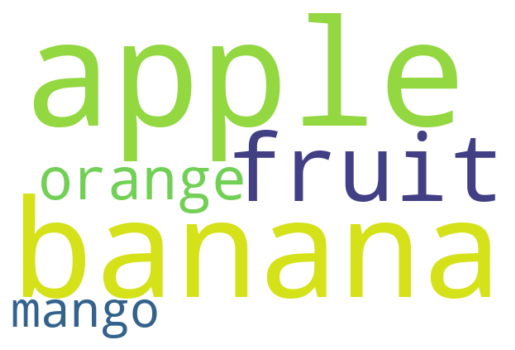

In [90]:
#wordcloud example

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "apple banana apple fruit banana fruit apple banana orange mango"

# Create word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# BerTopic(Bert)

  Obtaining dependency information for bertopic from https://files.pythonhosted.org/packages/a6/de/e1b9fd12678c36afa0176422a3819438c8e631409c3bf5c0896ad5dd555a/bertopic-0.17.0-py3-none-any.whl.metadata
  Obtaining dependency information for hdbscan>=0.8.29 from https://files.pythonhosted.org/packages/64/b1/96c347c7740efa1ac803be64155159284f92fafcff88c1077344e64eead5/hdbscan-0.8.40-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for umap-learn>=0.5.0 from https://files.pythonhosted.org/packages/3c/8f/671c0e1f2572ba625cbcc1faeba9435e00330c3d6962858711445cf1e817/umap_learn-0.5.7-py3-none-any.whl.metadata
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/d2/53/d23a97e0a2c690d40b165d1062e2c4ccc796be458a1ce59f6ba030434663/pynndescent-0.5.13-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.20.0 from https://files.pythonhosted.org/packages/d8/ec/ebef2f7d7c28503f958f0f8b992e7ce606fb74f9e891199329d5

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Gaurav_Singh\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [92]:
import pandas as pd
from bertopic import BERTopic

ModuleNotFoundError: No module named 'bertopic'